In [ ]:
!pip install celluloid

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML
from celluloid import Camera

In [ ]:
# Creates the transition matrix in much the same was as chutes
# Two main differences:  rotates base row instead of shifting (cyclical board)
#                        two rolls instead of one by squaring matrix
def make_transition_matrix(n_squares):
    base_row = np.zeros(n_squares)
    base_row[0:6] = 1 / 6.0
    rows = []
    for i in range(n_squares):
        # roll rotates the array. shifts over, and replaces 1st with last
        base_row = np.roll(base_row, 1)
        rows.append(base_row)
    transition_matrix = np.matrix(rows)
    # Square single-roll transition_matrix to get 2-roll matrix
    transition_matrix = transition_matrix * transition_matrix
    return transition_matrix


def add_chutes_ladder(transition_matrix, chute_ladders):
    for start, end in chute_ladders:
        transition_matrix[:, end - 1] += transition_matrix[:, start - 1]
        transition_matrix[:, start - 1] = 0
    return transition_matrix


def make_gif(transition_matrix, n_iterations):
    start_sqr = 1
    state = np.zeros(len(transition_matrix))
    state[start_sqr - 1] = 1
    n_iterations = 100

    fig = plt.figure()
    # Fix axes since states won't have large probability except at beginning
    plt.axis([0, 39, 0, 0.1])
    camera = Camera(fig)
    for i in range(n_iterations):
        state = np.asarray(state).flatten()
        plt.plot(state, 'b')
        camera.snap()
        state = state * transition_matrix
    animation = camera.animate(interval = 200, repeat = True, repeat_delay = 500)
    return HTML(animation.to_html5_video())

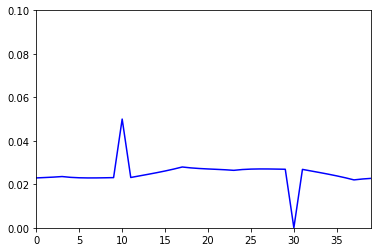

In [ ]:
n_squares = 40
transition_matrix = make_transition_matrix(n_squares)
# add go-to-jail
transition_matrix = add_chutes_ladder(transition_matrix, [(31, 11)])

# print(transition_matrix)
# np.set_printoptions(precision=3, suppress=True, linewidth=200)
make_gif(transition_matrix, 200, "monopoly")